# Mounting Drive for accessing datasets, csv files

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Importing required libraries

In [2]:
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np

# Loading Train Data

In [3]:
train_df=pd.read_csv('drive/My Drive/CMPE_258/Group_Project_258/Watson_Data/train.csv')
print('Number of rows and columns in train set:', train_df.shape)
train_df.head(5)

Number of rows and columns in train set: (12120, 6)


,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [4]:
# Checking the data types for each column
train_df.dtypes

id            object
premise       object
hypothesis    object
lang_abv      object
language      object
label          int64
dtype: object

In [5]:
# Checking for null values
print(train_df.isnull().sum())

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
label         0
dtype: int64


# Checking training dataset distribution for 15 languages.

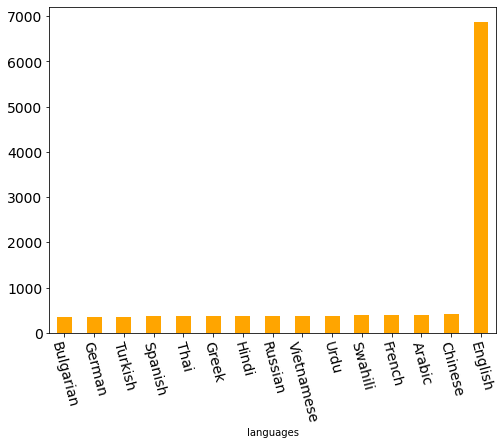

In [79]:
ax = train_df.language.value_counts().sort_values().plot.bar(rot=-75,color='orange',figsize=(8, 6),xlabel='languages', fontsize=14)

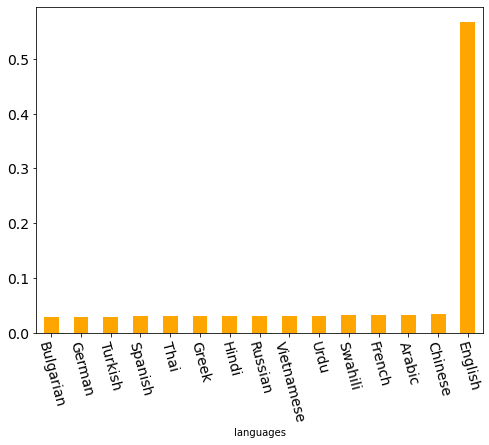

In [80]:
ax = train_df.language.value_counts(normalize=True).sort_values().plot.bar(rot=-75,color='orange',figsize=(8, 6),xlabel='languages', fontsize=14)

In [10]:
 train_df.lang_abv.value_counts()

en    6870
zh     411
ar     401
fr     390
sw     385
ur     381
vi     379
ru     376
hi     374
el     372
th     371
es     366
tr     351
de     351
bg     342
Name: lang_abv, dtype: int64

# Checking dataset distribution for three labels: 0,1, 2

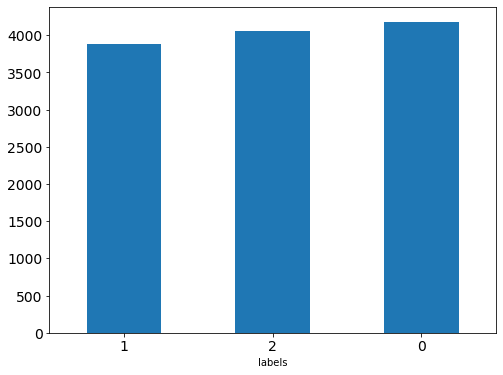

In [49]:
ax = train_df.label.value_counts().sort_values().plot.bar( rot=0,figsize=(8, 6),xlabel='labels', fontsize=14)

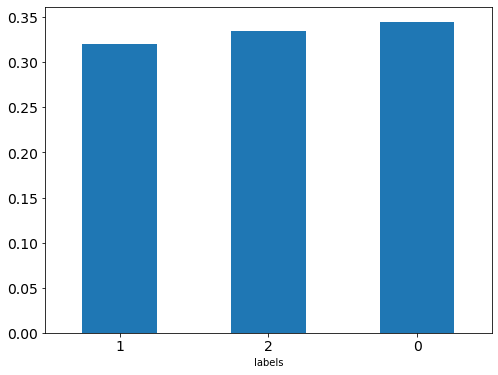

In [50]:
ax = train_df.label.value_counts(normalize=True).sort_values().plot.bar(rot=0,figsize=(8, 6),xlabel='labels', fontsize=14)

In [12]:
 train_df.label.value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

#Loading Test Data

In [14]:
test_df=pd.read_csv('drive/My Drive/CMPE_258/Group_Project_258/Watson_Data/test.csv')
print('Number of rows and columns in test set:', test_df.shape)
test_df.head(5)

Number of rows and columns in test set: (5195, 5)


,id,premise,hypothesis,lang_abv,language
0,c6d58c3f69,بکس، کیسی، راہیل، یسعیاہ، کیلی، کیلی، اور کولم...,"کیسی کے لئے کوئی یادگار نہیں ہوگا, کولمین ہائی...",ur,Urdu
1,cefcc82292,هذا هو ما تم نصحنا به.,عندما يتم إخبارهم بما يجب عليهم فعله ، فشلت ال...,ar,Arabic
2,e98005252c,et cela est en grande partie dû au fait que le...,Les mères se droguent.,fr,French
3,58518c10ba,与城市及其他公民及社区组织代表就IMA的艺术发展进行对话&amp,IMA与其他组织合作，因为它们都依靠共享资金。,zh,Chinese
4,c32b0d16df,Она все еще была там.,"Мы думали, что она ушла, однако, она осталась.",ru,Russian


In [15]:
# Checking for null values in test set
print(test_df.isnull().sum())

id            0
premise       0
hypothesis    0
lang_abv      0
language      0
dtype: int64


# Checking test dataset distribution for 15 languages.

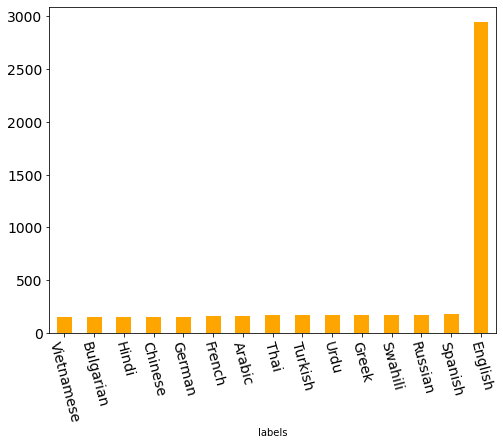

In [77]:
ax = test_df.language.value_counts().sort_values().plot.bar(rot=-75,color ='orange', figsize=(8, 6),xlabel='labels', fontsize=14 )

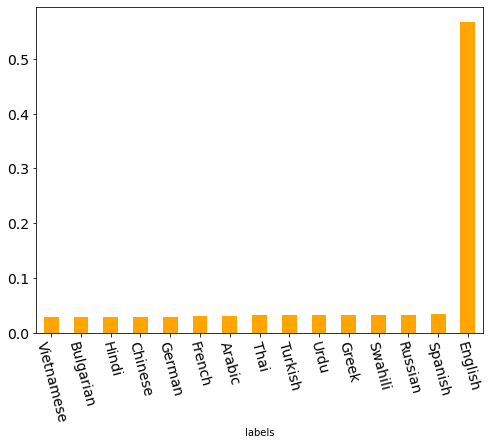

In [78]:
ax = test_df.language.value_counts(normalize=True).sort_values().plot.bar(rot=-75, color='orange',figsize=(8, 6),xlabel='labels', fontsize=14)

In [17]:
test_df.lang_abv.value_counts()

en    2945
es     175
sw     172
ru     172
ur     168
el     168
tr     167
th     164
ar     159
fr     157
de     152
zh     151
hi     150
bg     150
vi     145
Name: lang_abv, dtype: int64

# Word clouds

In [59]:
df_train_en = train_df.loc[train_df.language=='English'].copy()
df_train_en.shape

(6870, 6)

In [54]:
from wordcloud import WordCloud, STOPWORDS 

from PIL import Image
import requests

In [55]:
comment_words = '' 
stopwords = set(STOPWORDS)

In [63]:
for val in df_train_en.hypothesis: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [69]:
# pic = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png',stream=True).raw))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

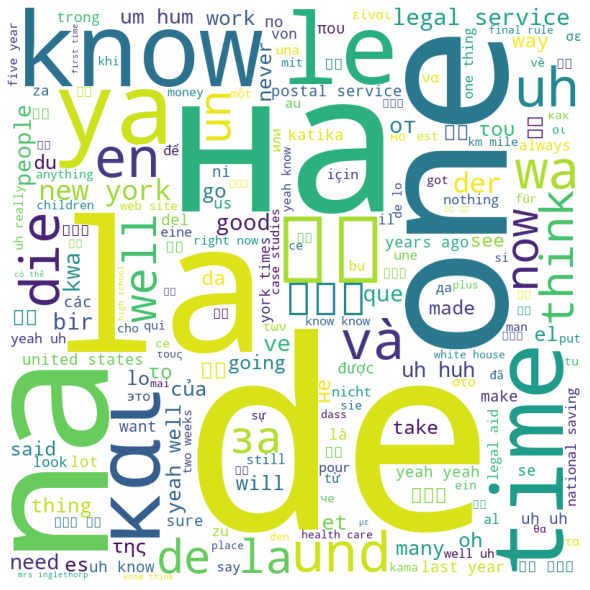

In [71]:
plt.figure(figsize = (8, 8), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()